# Import Libraries

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Data Understanding

In [7]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [8]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.shape

(150, 5)

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EDA

<Axes: xlabel='sepal_length', ylabel='Count'>

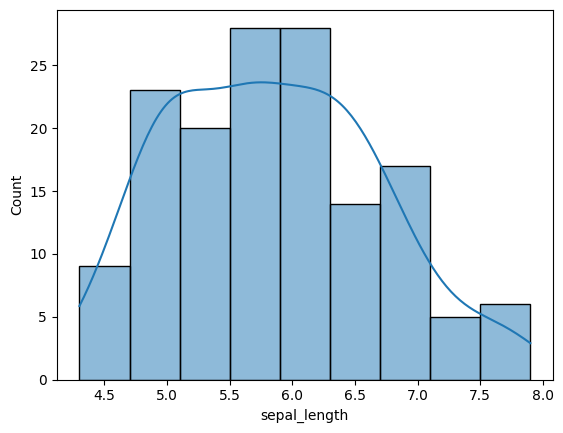

In [13]:
sns.histplot(df['sepal_length'], kde = True)

In [16]:
skew_sep_length = df['sepal_length'].skew()
print('sepal lenggth skewness: ', skew_sep_length)

sepal lenggth skewness:  0.3149109566369728


<Axes: xlabel='sepal_width', ylabel='Count'>

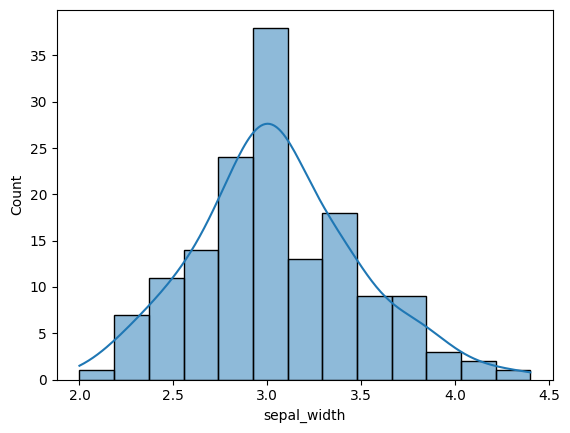

In [18]:
sns.histplot(df['sepal_width'], kde = True)

In [20]:
skew_sep_width = df['sepal_width'].skew()
print('sepal with skewness: ', skew_sep_width)

sepal with skewness:  0.3340526621720866


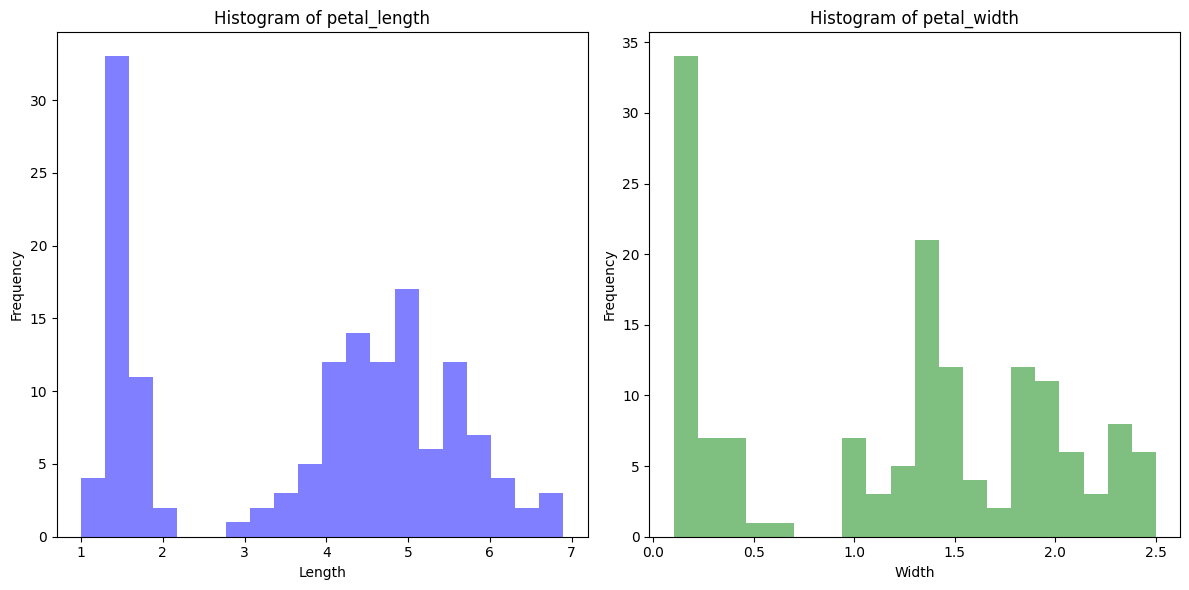

In [22]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(df['petal_length'], bins=20, alpha=0.5, color='blue')
ax1.set_title('Histogram of petal_length')
ax1.set_xlabel('Length')
ax1.set_ylabel('Frequency')

ax2.hist(df['petal_width'], bins=20, alpha=0.5, color='green')
ax2.set_title('Histogram of petal_width')
ax2.set_xlabel('Width')
ax2.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

# Handlng With Outliers

In [27]:
fig = px.box(data_frame = df, y = 'sepal_length')
fig.show()

fig = px.box(data_frame = df, y = 'sepal_width')
fig.show()

fig = px.box(data_frame = df, y = 'petal_length')
fig.show()

fig = px.box(data_frame = df, y = 'petal_width')
fig.show()

# Model

In [28]:
X = df.drop('species', axis = 1)
y = df['species']

In [29]:
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
model = RandomForestClassifier(random_state = 42)

In [34]:

from sklearn.pipeline import Pipeline



pipeline = Pipeline([
    ('model', model)
    ])
    

scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    

mean_accuracy = scores.mean()
    

pipeline.fit(X_train, y_train)
    

y_pred = pipeline.predict(X_test)
    

accuracy = accuracy_score(y_test, y_pred)
    
print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)

best_model = pipeline
    

import pickle
pickle.dump(best_model, open('iris_model.dot', 'wb'))

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9416666666666667
Test Accuracy: 1.0
